# Frag-MaP data analysis LSU

## Imports

In [39]:
%load_ext autoreload
%autoreload 2

import rnavigate as rnav
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import fragmapper as fmap
pd.options.display.max_columns = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get sample data

In [40]:
def get_sample(replicate, fragment):
    return rnav.Sample(
        sample=f'{fragment}{replicate}',
        shapemap=f'../data/rep{replicate}/{replicate}_{fragment}_DMSO_subtracted_LSU_profile.txt',
        log=f'../data/rep{replicate}/{replicate}_{fragment}_DMSO_subtracted_LSU_shapemapper_log.txt'
    )

Methyl0_LSU = get_sample('0', 'Methyl')
ZLD0_LSU = get_sample('0', 'ZLD')
QN0_LSU = get_sample('0', 'QN')

Methyl1_LSU = get_sample('1', 'Methyl')
ZLD1_LSU = get_sample('1', 'ZLD')
QN1_LSU = get_sample('1', 'QN')

Methyl2_LSU = get_sample('2', 'Methyl')
ZLD2_LSU = get_sample('2', 'ZLD')
QN2_LSU = get_sample('2', 'QN')

## Get Frag-MaP profiles

In [41]:
fm_ZLD0 = fmap.Fragmapper(ZLD0_LSU, Methyl0_LSU, parameters={'correction_method': None})
fm_ZLD1 = fmap.Fragmapper(ZLD1_LSU, Methyl1_LSU, parameters={'correction_method': None})
fm_ZLD2 = fmap.Fragmapper(ZLD2_LSU, Methyl2_LSU, parameters={'correction_method': None})

fm_QN0 = fmap.Fragmapper(QN0_LSU, Methyl0_LSU, parameters={'correction_method': None})
fm_QN1 = fmap.Fragmapper(QN1_LSU, Methyl1_LSU, parameters={'correction_method': None})
fm_QN2 = fmap.Fragmapper(QN2_LSU, Methyl2_LSU, parameters={'correction_method': None}) 

## Plot mutation rate profiles

### Linezolid probe (rep 1)

Text(0.5, 0, 'Nucleotide position')

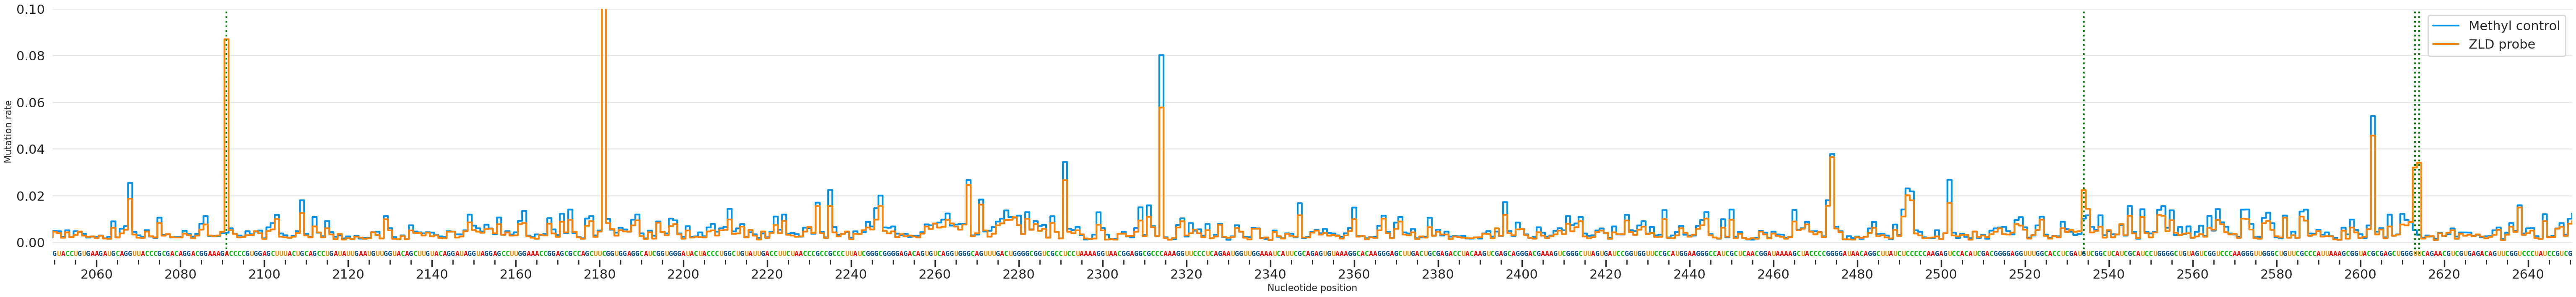

In [42]:
plot = rnav.plot_skyline(samples=[fm_ZLD1],
                         profile="fragmap",
                         columns=["Modified_rate_2", "Modified_rate_1"],
                         seq_source='shapemap',
                         region=[2050, 2650],
                         annotations=['fragmap_sites'])
plot.axes[0, 0].set(ylim=[-0.005, 0.10])
plot.ax.legend(['Methyl control', 'ZLD probe'])

plt.ylabel("Mutation rate", size=16)
plt.xlabel("Nucleotide position", size=16)

### Quinoxaline probe (rep 1)

Text(0.5, 0, 'Nucleotide position')

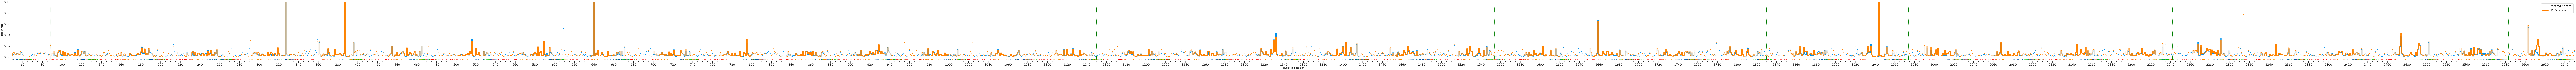

In [43]:
plot = rnav.plot_skyline(samples=[fm_QN1],
                         profile="fragmap",
                         columns=["Modified_rate_2", "Modified_rate_1"],
                         seq_source='shapemap',
                         region=[50, 2650],
                         annotations=['fragmap_sites'])
plot.axes[0, 0].set(ylim=[-0.005, 0.10])
plot.ax.legend(['Methyl control', 'ZLD probe'])

plt.ylabel("Mutation rate", size=16)
plt.xlabel("Nucleotide position", size=16)

## Plot Frag-MaP profiles

### Linezolid probe (rep 0-2)

Text(0.5, 0, 'Nucleotide position')

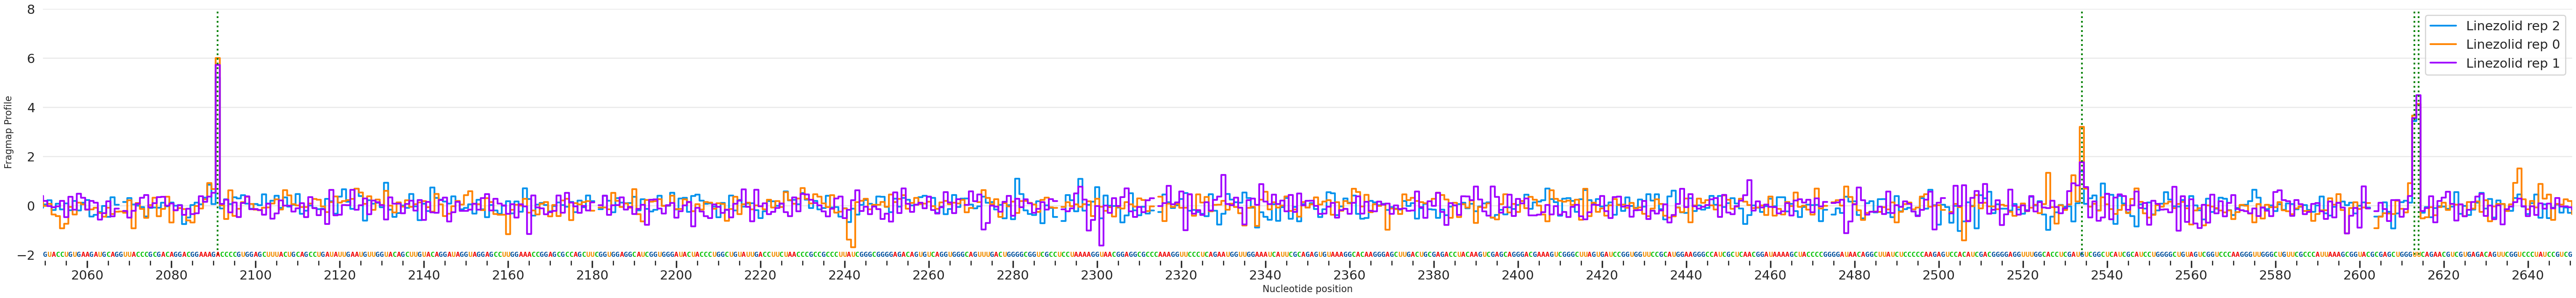

In [44]:
plot = rnav.plot_skyline(samples=[fm_ZLD2, fm_ZLD0, fm_ZLD1],
                         profile="fragmap",
                         columns=["Fragmap_profile"],
                         seq_source='shapemap',
                         region=[2050, 2650],
                         annotations=['fragmap_sites'])
plot.axes[0, 0].set(ylim=[-2, 8])
plot.ax.legend(['Linezolid rep 2', 'Linezolid rep 0', 'Linezolid rep 1'])

plt.ylabel("Fragmap Profile", size=16)
plt.xlabel("Nucleotide position", size=16)

### Quinoxaline probe (rep 0-2)

Text(0.5, 0, 'Nucleotide position')

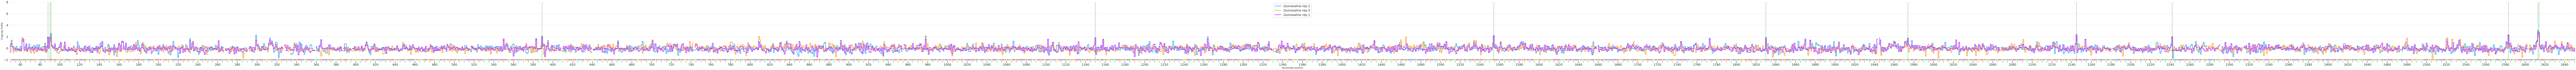

In [45]:
plot = rnav.plot_skyline(samples=[fm_QN2, fm_QN0, fm_QN1],
                         profile="fragmap",
                         columns=["Fragmap_profile"],
                         seq_source='shapemap',
                         region=[50, 2650],
                         annotations=['fragmap_sites'])
plot.axes[0, 0].set(ylim=[-2, 8])
plot.ax.legend(['Quinoxaline rep 2', 'Quinoxaline rep 0', 'Quinoxaline rep 1'])

plt.ylabel("Fragmap Profile", size=16)
plt.xlabel("Nucleotide position", size=16)

## Plot scatter plots

### Linezolid probe rep 1 (mutation rate)

(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='Methyl1 Modified_rate', ylabel='ZLD1 Modified_rate'>)

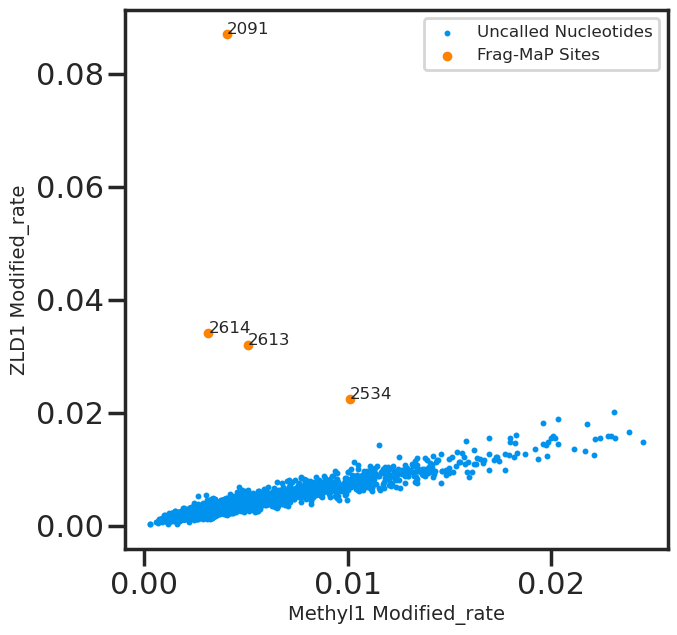

In [46]:
fm_ZLD1.plot_scatter()

### Linezolid probe rep 1 (Frag-MaP profile/zscore)

(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='Methyl1 zscore', ylabel='ZLD1 zscore'>)

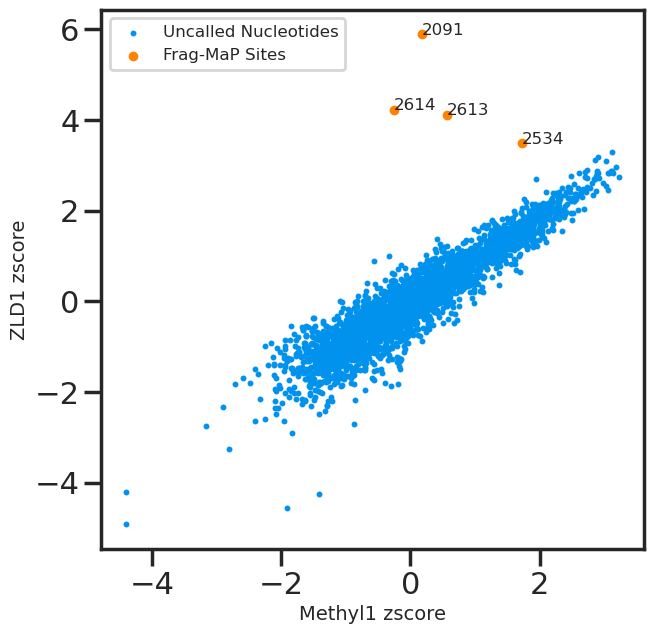

In [47]:
fm_ZLD1.plot_scatter(column='zscore')

### Quinoxaline probe rep 1 (mutation rate)

(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='Methyl1 Modified_rate', ylabel='QN1 Modified_rate'>)

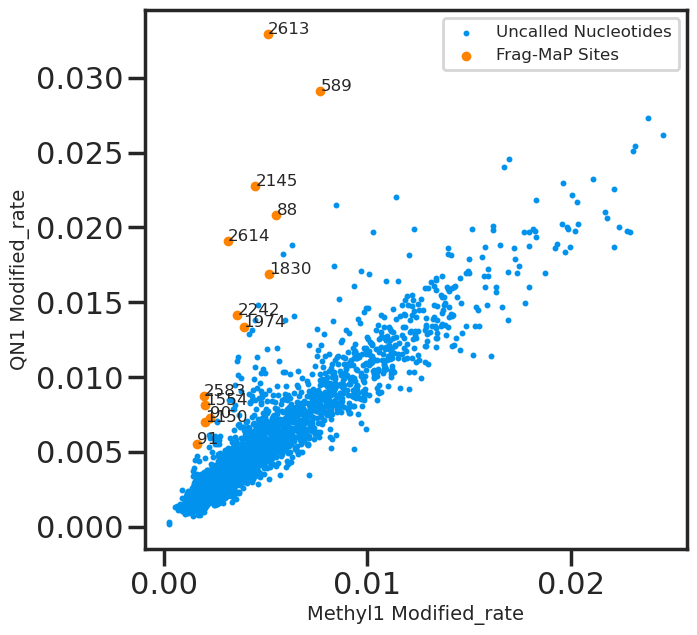

In [48]:
fm_QN1.plot_scatter()

### Quinoxaline probe rep 1 (Frag-Map profile/zscore)

(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='Methyl1 zscore', ylabel='QN1 zscore'>)

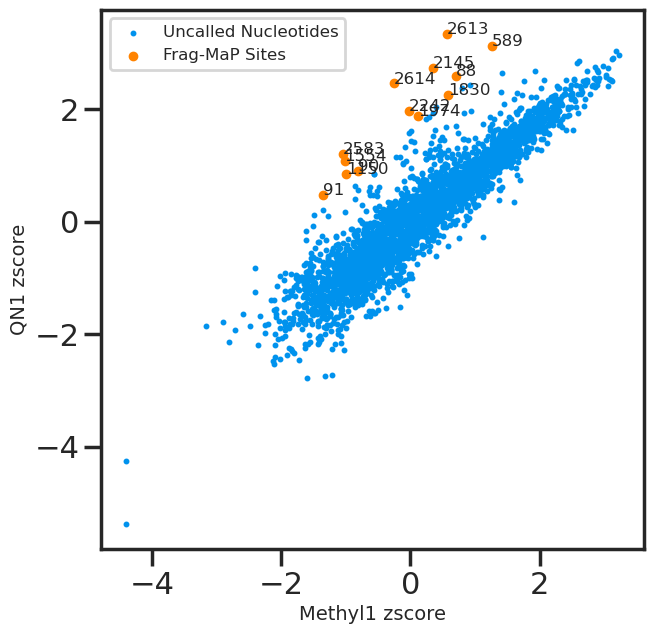

In [49]:
fm_QN1.plot_scatter(column='zscore')

## Average scatter plot (rep 0-2)

In [74]:
def get_average_fragmap(sample_0, sample_1, sample_2):

    sample_0 = sample_0.data["fragmap"].data
    sample_1 = sample_1.data["fragmap"].data
    sample_2 = sample_2.data["fragmap"].data

    columns = ['Nucleotide', 'zscore_1', 'zscore_2', 'Site', 'Modified_effective_depth_1']
    plot_df =  pd.merge(pd.merge(sample_0[columns], sample_1[columns], on='Nucleotide'), sample_2[columns], on='Nucleotide')
    plot_df['y_avg'] = plot_df[['zscore_1_x', 'zscore_1_y', 'zscore_1']].mean(axis=1)
    plot_df['y_sem'] = plot_df[['zscore_1_x', 'zscore_1_y', 'zscore_1']].sem(axis=1)
    plot_df['x_avg'] = plot_df[['zscore_2_x', 'zscore_2_y', 'zscore_2']].mean(axis=1)
    plot_df['x_sem'] = plot_df[['zscore_2_x', 'zscore_2_y', 'zscore_2']].sem(axis=1)
    plot_df['Depth_avg'] = plot_df[['Modified_effective_depth_1_x', 'Modified_effective_depth_1_y', 'Modified_effective_depth_1']].mean(axis=1)
    plot_df[['Site_x', 'Site_y', 'Site']] = plot_df[['Site_x', 'Site_y', 'Site']].astype(int)
    plot_df['Duplicate'] = plot_df[['Site_x', 'Site_y', 'Site']].mean(axis=1)

    return plot_df

In [75]:
ZLD_avg_fragmap = get_average_fragmap(fm_ZLD0, fm_ZLD1, fm_ZLD2)
QN_avg_fragmap = get_average_fragmap(fm_QN0, fm_QN1, fm_QN2)

In [115]:
def plot_scatter(df, column='avg', xmax=None, ymax=None, xmin=None, ymin=None, **kwargs) -> 'scatter_plot':
    """Generates scatter plots useful for fragmapper quality control.

    Args:
        column (str, optional): Dataframe column containing data to plot 
                                (must be avalible for the sample and control).
                                Defaults to 'Modified_rate'.
        x_max (_type_, optional): Maximun values for the x-axis. Defaults to None.
        y_max (_type_, optional): Maximum value for the y-axis. Defaults to None.

    Returns:
        scatter_plot: Scatter plot with control values on the x-axis,
                        sample values on the y-axis, and each point
                        representing a nucleotide not filtered out in the
                        fragmapper pipeline.
    """
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    fig, ax = plt.subplots(1, 1, figsize=(7, 7), **kwargs)

    scatter_data = df.copy()

    scatter_data.loc[scatter_data['Depth_avg'] > 10000, 'Region'] = True

    scatter_data.loc[scatter_data['Duplicate'] > 0.6, 'Positive_mask'] = True

    pos_sites = scatter_data.loc[scatter_data['Positive_mask']
                                    == True, 'Nucleotide'].tolist()

    sites = pos_sites

    x_max = scatter_data[f'x_{column}'].max()*1.1
    x_min = scatter_data[f'x_{column}'].min()*1.1

    y_max = scatter_data[f'y_{column}'].max()*1.1
    y_min = scatter_data[f'y_{column}'].min()*1.1

    for site in sites:
        x = scatter_data.loc[scatter_data['Nucleotide']
                                == site, f'x_{column}'].values
        y = scatter_data.loc[scatter_data['Nucleotide']
                                == site, f'y_{column}'].values

        ax.text(x+0.05, y+0.05, site, fontsize=12)

    ax.scatter(scatter_data.loc[scatter_data['Region'] == True, f'x_{column}'].values,
                scatter_data.loc[scatter_data['Region'] == True, f'y_{column}'].values, s=10, ec='none', alpha=0.25)
    # ax.scatter(scatter_data.loc[scatter_data['Positive_mask'] == True, f'x_{column}'].values,
    #             scatter_data.loc[scatter_data['Positive_mask'] == True, f'y_{column}'].values, s=25, ec='none')
    
    plt.errorbar(scatter_data.loc[scatter_data['Positive_mask'] == True, f'x_{column}'].values,
                                  scatter_data.loc[scatter_data['Positive_mask'] == True, f'y_{column}'].values,
                                  xerr=scatter_data.loc[scatter_data['Positive_mask'] == True, f'x_sem'].values, 
                                  yerr=scatter_data.loc[scatter_data['Positive_mask'] == True, f'y_sem'].values,
                                  fmt='o',
                                  markersize=5,
                                  color='darkorange',
                                  ecolor='darkorange',
                                  elinewidth=1)


    if xmax is not None:
        x_max = xmax
    if xmax is not None:
        x_min = xmin
    if ymax is not None:
        y_max = ymax
    if ymax is not None:
        y_min = ymin

    ax.set(xlim=[x_min, x_max],
            ylim=[y_min, y_max])

    ax.set_xlabel(f'', fontsize=14)
    ax.set_ylabel(f'', fontsize=14)
    ax.set_aspect('equal')

    # plt.xticks(ticks=[0,5])
    # plt.yticks(ticks=[0,5,10])

### Linezolid probe (avg. Frag-MaP profile/zscore)
#### Used for Figure 3

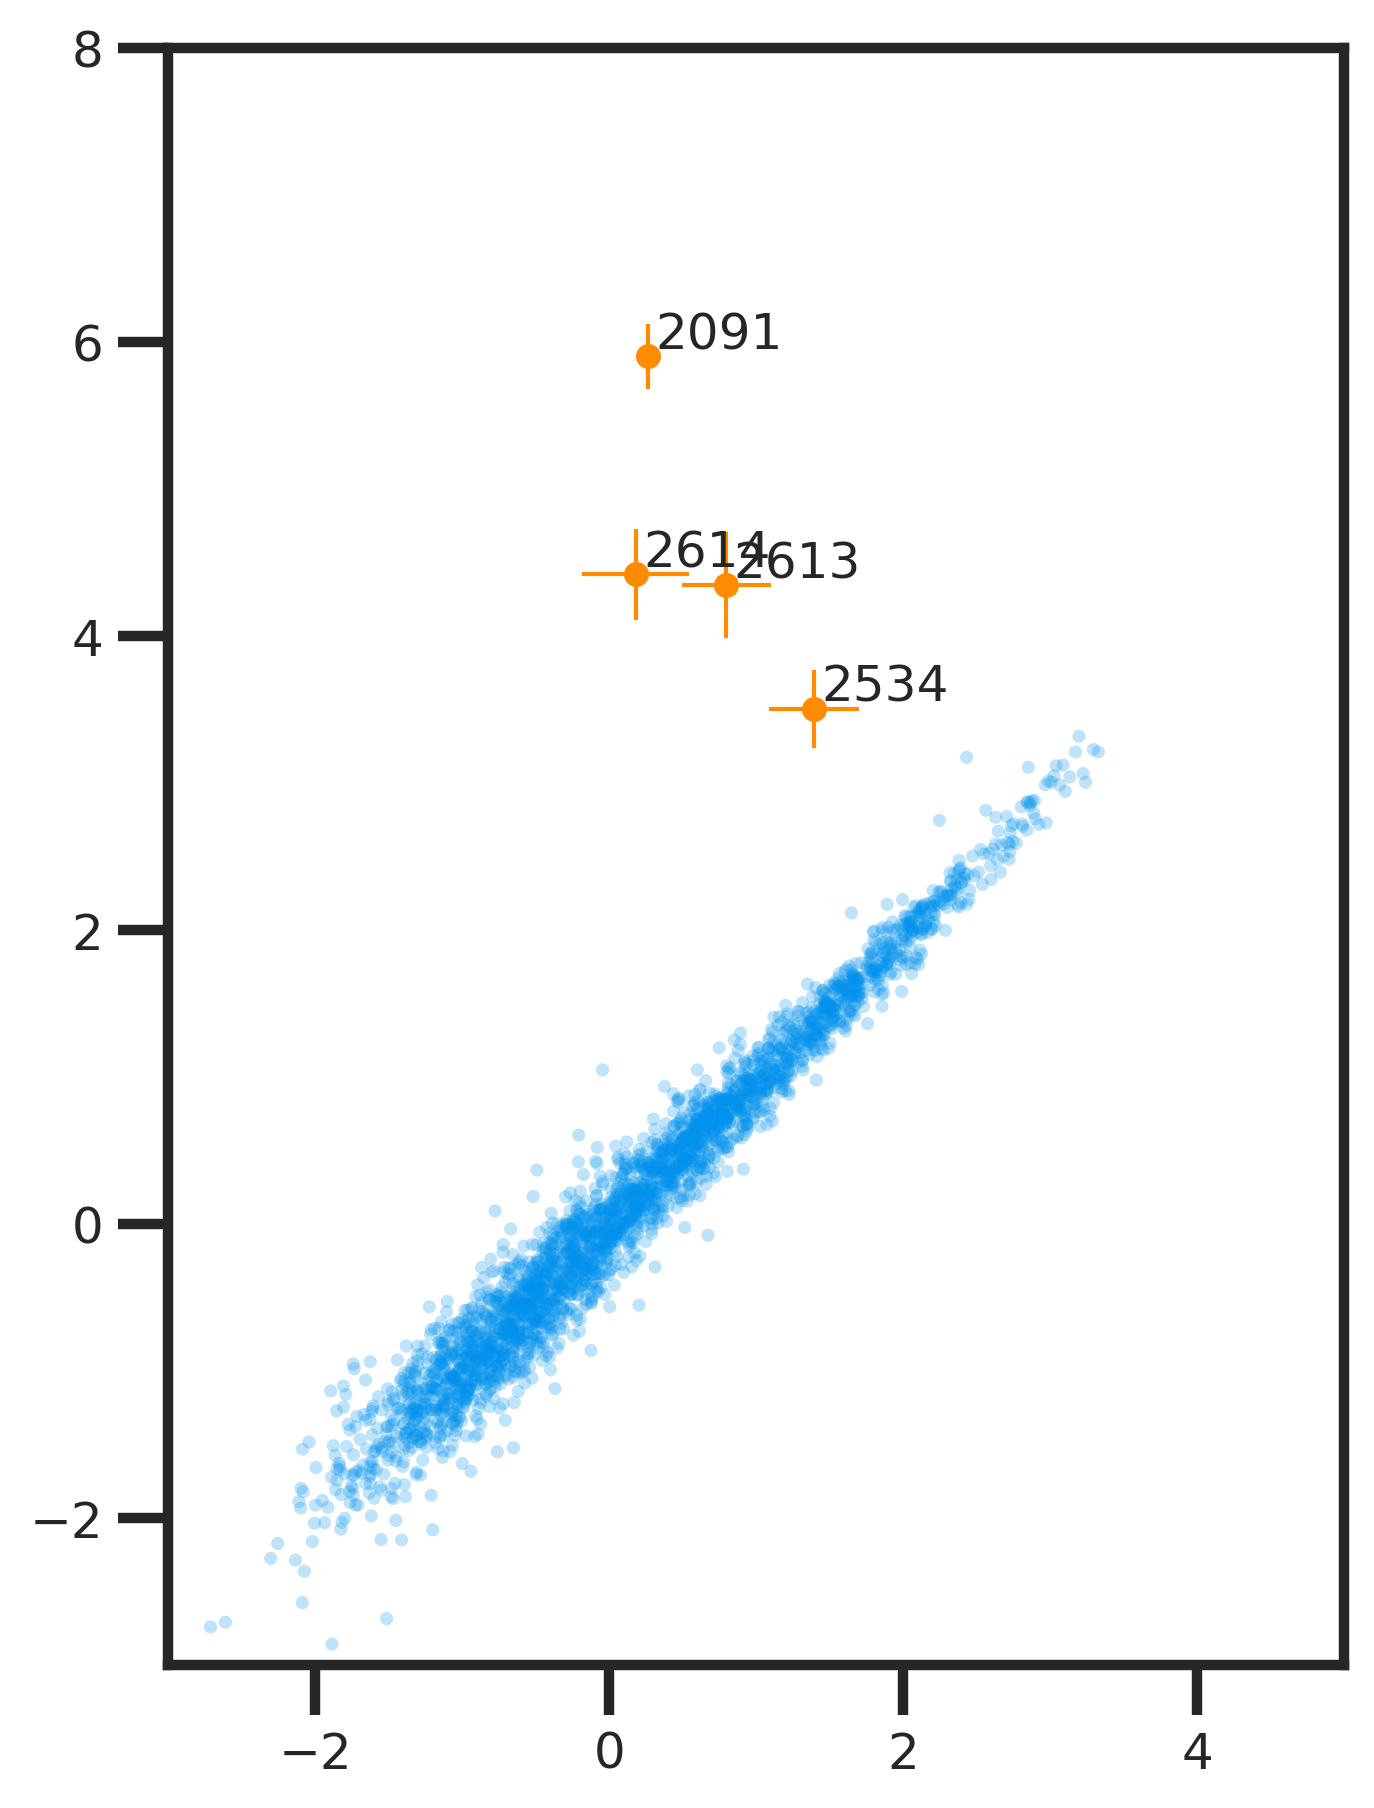

In [116]:
plot_scatter(df=ZLD_avg_fragmap, column='avg', xmax=5, ymax=8, xmin=-3, ymin=-3, dpi=300)
plt.savefig('ZLD_average_scatter_plot.svg', dpi='figure')

### Quinoxaline probe (avg. Frag-MaP profile/zscore)
#### Used for Figure 3

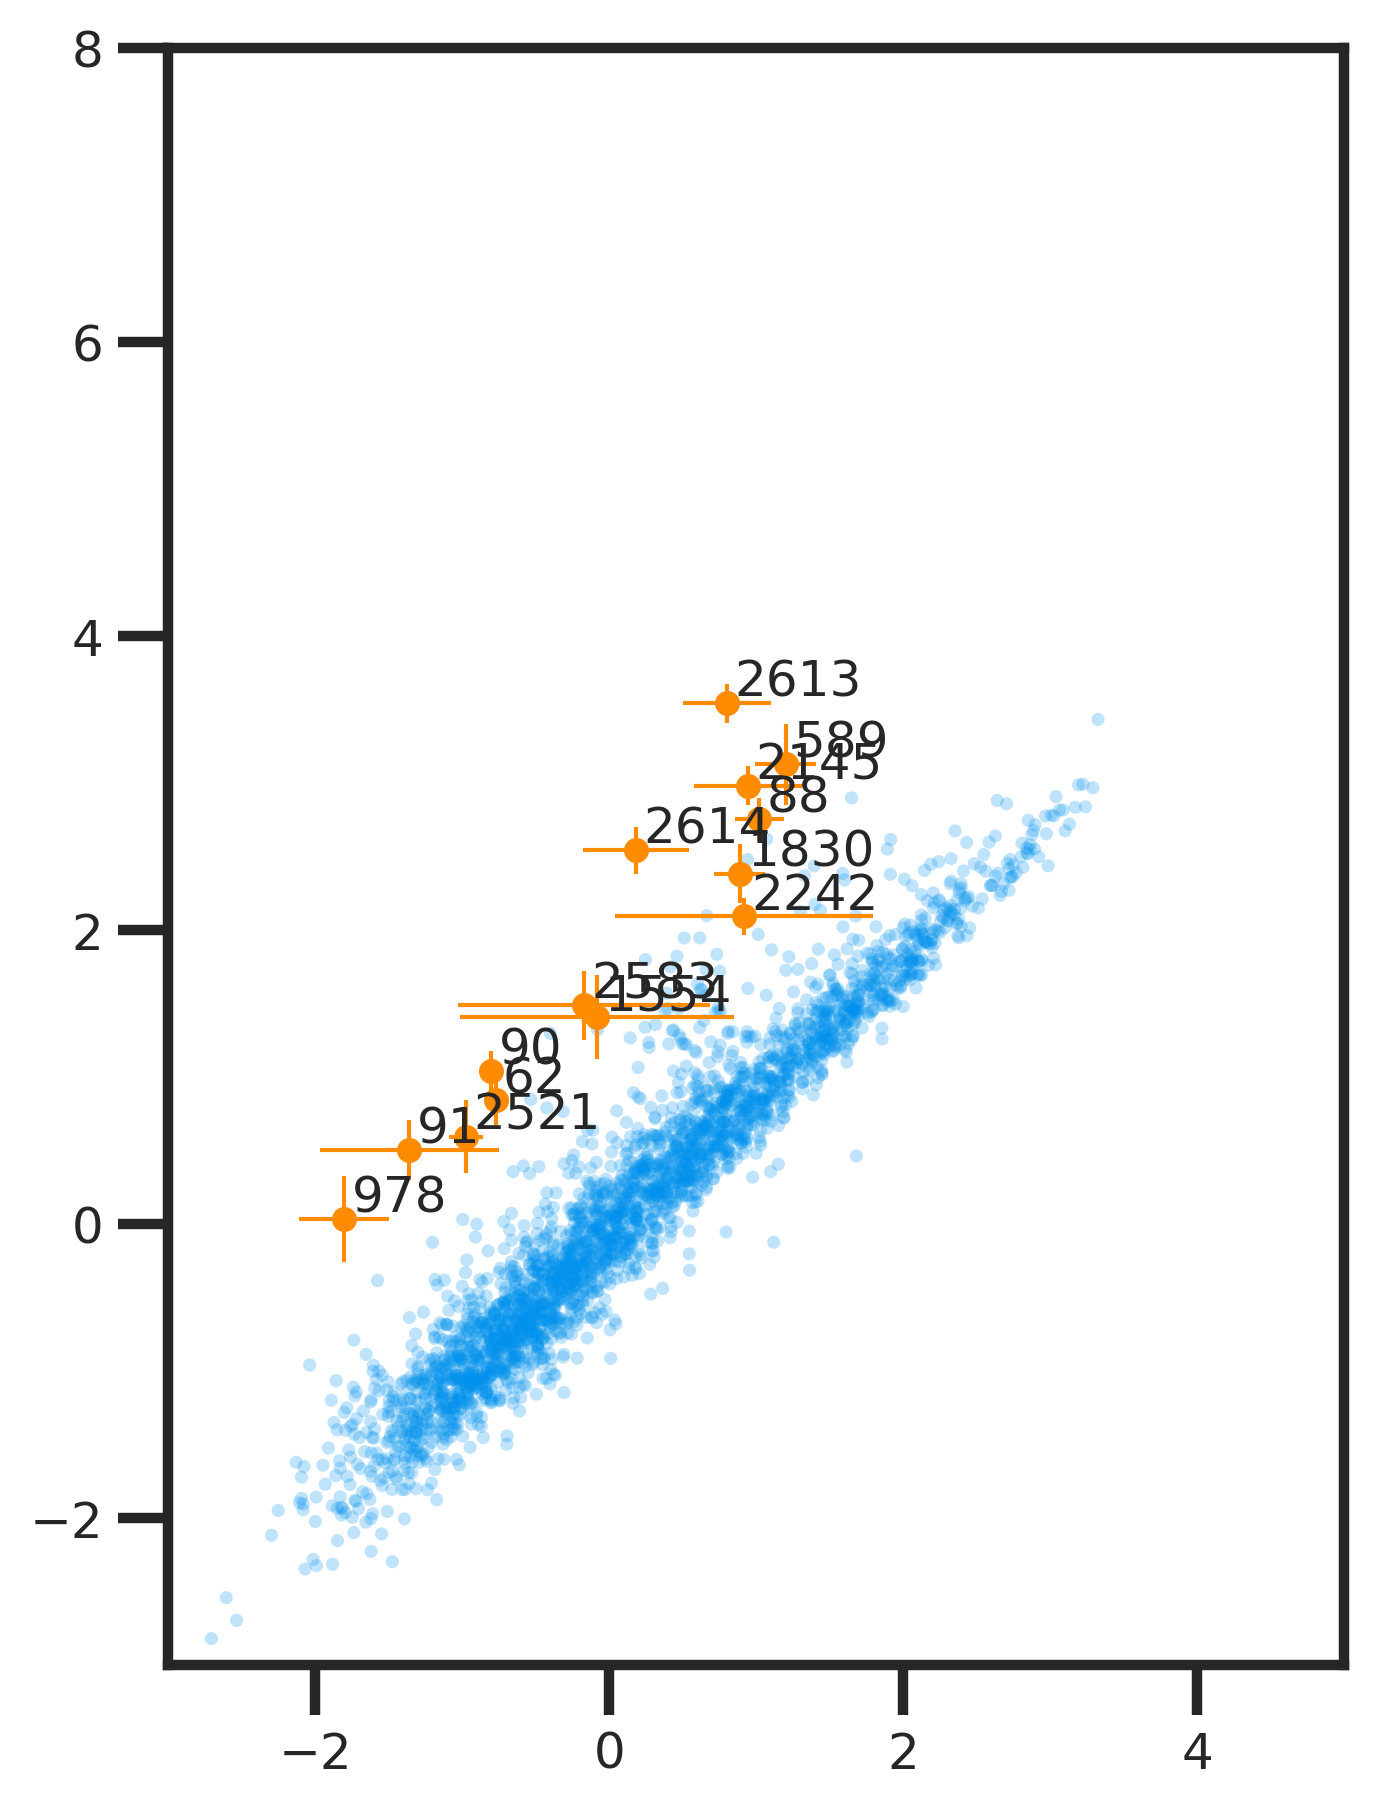

In [117]:
plot_scatter(df=QN_avg_fragmap, column='avg', xmax=5, ymax=8, xmin=-3, ymin=-3, dpi=300)
plt.savefig('QN_average_scatter_plot.svg', dpi='figure')

## 

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import prody as prody
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import norm


def calc_min_dist_to_STP(pdb_path, rna_indices=None, rna_chain_id=None,
                         stp_indices=None, stp_chain_id=None, protein_dist=True):
    # Read in the PDB file
    structure = prody.parsePDB(pdb_path)

    # Select the RNA residues and STP residues based on the input indices and chain IDs
    if rna_indices is not None:
        rna_sele = structure.select(
            f"chain {rna_chain_id} and resid {' '.join(map(str, rna_indices))} and nucleic")
    else:
        rna_sele = structure.select(f"chain {rna_chain_id} and nucleic")

    if stp_indices is not None:
        stp_sele = structure.select(
            f"chain {stp_chain_id} and resid {' '.join(map(str, stp_indices))} and resname STP and not within 8 of protein")

    elif stp_chain_id is not None:
        stp_sele = structure.select(f"chain {stp_chain_id} and resname STP")

    else:
        stp_sele = structure.select(f"resname STP")
    
    # Calculate the minimum distances between each RNA residue and the STP residues
    min_dists = []

    assert rna_sele is not None, "No rna atoms were found."
    assert stp_sele is not None, "No STP atoms were found."

    if protein_dist:
        protein_sele = structure.select(f"protein")
        for rna_atom in rna_sele:
            dists_stp = prody.calcDistance(rna_atom, stp_sele)
            min_dist_stp = dists_stp.min()
            stp_residue_num = stp_sele[dists_stp.argmin()].getResnum()
            dists_protein = prody.calcDistance(rna_atom, protein_sele)
            min_dist_protein = dists_protein.min()

            min_dists.append({'Nucleotide': rna_atom.getResnum(),
                            'Min_dist_to_STP': min_dist_stp,
                            'Min_dist_to_protein': min_dist_protein,
                            'Pocket_num': stp_residue_num})
    else:
        for rna_atom in rna_sele:
            dists_stp = prody.calcDistance(rna_atom, stp_sele)
            min_dist_stp = dists_stp.min()
            stp_residue_num = stp_sele[dists_stp.argmin()].getResnum()
            
            min_dists.append({'Nucleotide': rna_atom.getResnum(),
                            'Min_dist_to_STP': min_dist_stp,
                            'STP_residue_num': stp_residue_num})

    # Convert the results to a Pandas dataframe and return it
    df = pd.DataFrame(min_dists)
    min_dist_df = df.loc[df.groupby(
        'Nucleotide').Min_dist_to_STP.idxmin()].reset_index(drop=True)
    return min_dist_df


def plot_cat_strip(dfs, column='Min_dist_to_STP', title='Distance from Frag-MaP sites to pockets', xticklabels=None, ylabel='Min. distance to pocket (Å)'):
    """
    Create a swarm plot to compare multiple dataframes.

    Args:
        dfs (list of pd.DataFrames): The dataframes to compare.
        column (str): The name of the column in each dataframe to plot.
        title (str): The title of the plot.
        xticklabels (list of str): The labels for the x-axis.

    Returns:
        None
    """
    sns.set(font_scale=1)
    sns.set_style("whitegrid")

    # Create a list of dataframes if only a single dataframe is passed
    if isinstance(dfs, pd.DataFrame):
        dfs = [dfs]

    # Merge the specified column for each dataframe into a new dataframe
    merged_df = pd.concat([df[column] for df in dfs], axis=1)
    if xticklabels is not None:
        merged_df.columns = xticklabels

    # Create boxen plot
    gfg = sns.catplot(data=merged_df, kind='boxen', linewidth=1.5)
    # Set the plot title and axis labels
    gfg.set(xlabel="Frag-Map sites", ylabel=ylabel, title=title)
    # Save Boxen plot
    plt.savefig('Frag-MaP_boxen_plot.svg')

    # Create swarm plot
    gfg = sns.catplot(data=merged_df, kind='swarm',
                      size=5, alpha=1, marker='o')
    # Set the plot title and axis labels
    gfg.set(xlabel="Frag-Map sites", ylabel=column, title=title)
    # Save strip plot
    plt.savefig('Frag-MaP_swarm_plot.svg')

    # Show the plot
    plt.show()


def mann_whitney_compare(df1, df2, column_name, alternative='greater'):
    """
    Performs Mann-Whitney U test to compare the distribution of a column in two dataframes
    
    Args:
    df1 (pandas.DataFrame): first dataframe to compare
    df2 (pandas.DataFrame): second dataframe to compare
    column_name (str): name of the column to compare in both dataframes
    
    Returns:
    p-value (float): p-value from the Mann-Whitney U test
    """
    x = df1[column_name]
    y = df2[column_name]

    _, p_value = mannwhitneyu(x, y, alternative=alternative)

    sigma = norm.ppf(1 - p_value/2)

    return p_value, sigma

In [123]:
all_res_7AS8 = calc_min_dist_to_STP("../data/7AS8_pockets.pdb", rna_indices=None, rna_chain_id='A',
                                    stp_indices=None, stp_chain_id=None, protein_dist=False)
ZLD_res_7AS8 = calc_min_dist_to_STP("../data/7AS8_pockets.pdb", rna_indices=[2091, 2613, 2614, 2534], rna_chain_id='A',
                                    stp_indices=None, stp_chain_id=None)
QN_res_7AS8 = calc_min_dist_to_STP("../data/7AS8_pockets.pdb", rna_indices=[62, 88, 90, 91, 1830, 2242, 2613, 2614, 2521, 2583], rna_chain_id='A',
                                   stp_indices=None, stp_chain_id=None)

In [124]:
ZLD_res_7AS8

,Nucleotide,Min_dist_to_STP,Min_dist_to_protein,Pocket_num
0,2091,7.043737,3.904469,46
1,2534,3.043075,10.937939,40
2,2613,6.735555,15.749311,40
3,2614,3.371938,15.881610,40


In [125]:
QN_res_7AS8

,Nucleotide,Min_dist_to_STP,Min_dist_to_protein,Pocket_num
0,62,3.057954,10.182924,23
1,88,3.089808,5.965945,23
2,90,3.017084,9.580281,23
3,91,3.016401,7.909078,23
4,1830,4.897766,7.480606,70
5,2242,3.044427,11.645960,22
6,2521,6.799175,12.875266,53
7,2583,10.645788,15.898127,57
8,2613,6.735555,15.749311,40
9,2614,3.371938,15.881610,40


/home/sethv/anaconda3/envs/fpocket-R/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sethv/anaconda3/envs/fpocket-R/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


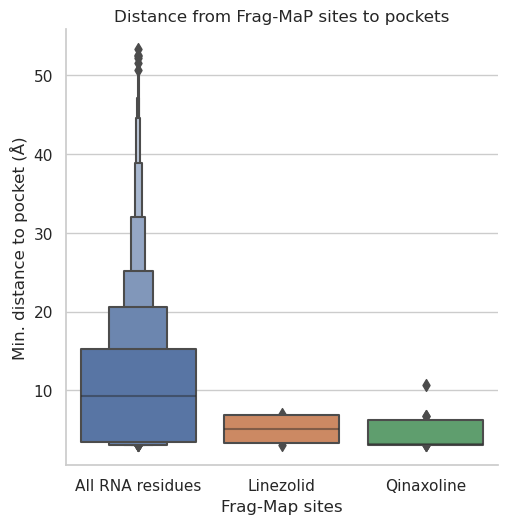

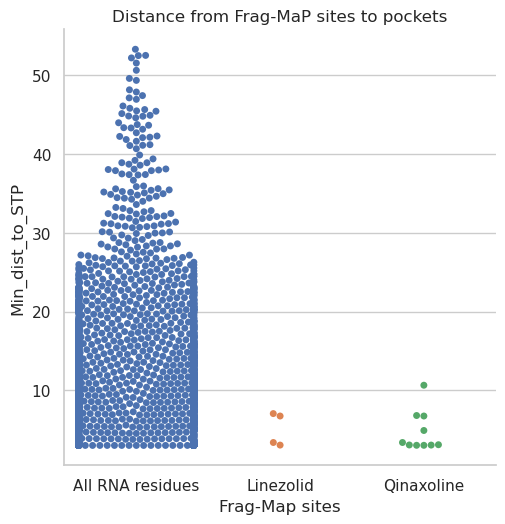

In [137]:
plot_cat_strip([all_res_7AS8, ZLD_res_7AS8,
                QN_res_7AS8], column='Min_dist_to_STP', xticklabels=['All RNA residues', 'Linezolid', 'Qinaxoline'])

In [127]:
mann_whitney_compare(all_res_7AS8, ZLD_res_7AS8, 'Min_dist_to_STP')

(0.06688116265521024, 1.8324717782430593)

In [128]:
mann_whitney_compare(all_res_7AS8, QN_res_7AS8, 'Min_dist_to_STP')

(0.0022556915012205995, 3.0543229018852793)

In [130]:
all_res_6HA1 = calc_min_dist_to_STP("../data/6HA1_pockets.pdb", rna_indices=None, rna_chain_id='A',
                                    stp_indices=None, stp_chain_id=None, protein_dist=False)
ZLD_res_6HA1 = calc_min_dist_to_STP("../data/6HA1_pockets.pdb", rna_indices=[2091, 2613, 2614, 2534], rna_chain_id='A',
                                    stp_indices=None, stp_chain_id=None)
QN_res_6HA1 = calc_min_dist_to_STP("../data/6HA1_pockets.pdb", rna_indices=[62, 88, 90, 91, 1830, 2242, 2613, 2614, 2521, 2583], rna_chain_id='A',
                                   stp_indices=None, stp_chain_id=None)

In [131]:
ZLD_res_6HA1

,Nucleotide,Min_dist_to_STP,Min_dist_to_protein,Pocket_num
0,2091,3.186444,11.853619,106
1,2534,3.019068,9.394066,50
2,2613,7.552060,16.178401,11
3,2614,3.214610,14.322927,106


In [132]:
QN_res_6HA1

,Nucleotide,Min_dist_to_STP,Min_dist_to_protein,Pocket_num
0,62,3.001287,9.198732,58
1,88,3.235655,7.327122,58
2,90,3.437071,7.745305,58
3,91,3.998497,9.488746,58
4,1830,3.010920,5.792339,67
5,2242,3.050469,11.841853,35
6,2521,3.106003,12.389809,110
7,2583,10.791768,16.540240,11
8,2613,7.552060,16.178401,11
9,2614,3.214610,14.322927,106


/home/sethv/anaconda3/envs/fpocket-R/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sethv/anaconda3/envs/fpocket-R/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 78.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


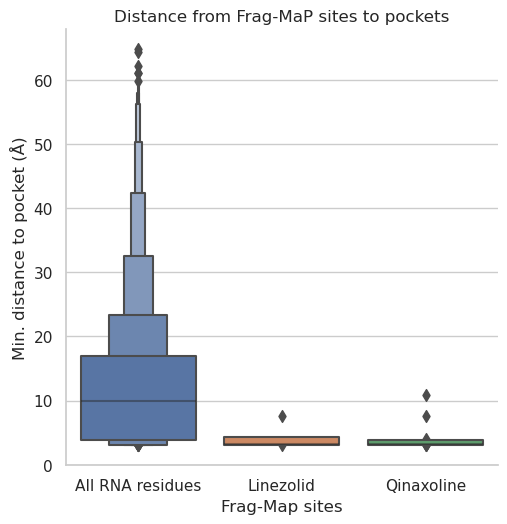

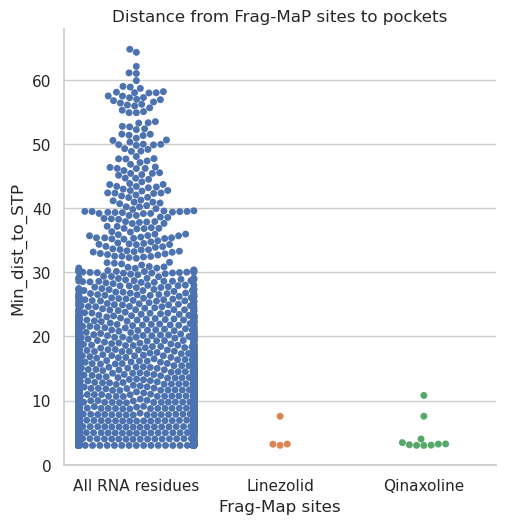

In [133]:
plot_cat_strip([all_res_6HA1, ZLD_res_6HA1,
                QN_res_6HA1], column='Min_dist_to_STP', xticklabels=['All RNA residues', 'Linezolid', 'Qinaxoline'])

In [134]:
mann_whitney_compare(all_res_6HA1, ZLD_res_6HA1, 'Min_dist_to_STP')

(0.02390707998522662, 2.258619239551212)

In [135]:
mann_whitney_compare(all_res_6HA1, QN_res_6HA1, 'Min_dist_to_STP')

(0.0009227731071104845, 3.3130717292574032)